# Example of Map Generation

Map generated in 0.174815 seconds


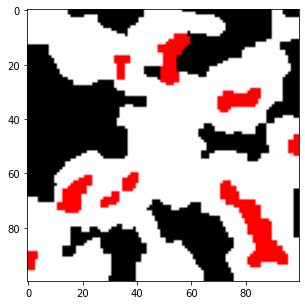

In [9]:
from swarm_mapping.map import Map
import time

t0 = time.time()
m = Map(100, 100, space_fill=0.5, hazard_fill=0.2, fast=False)
tf = time.time()
m.show()
print(f"Map generated in {round(tf - t0, 6)} seconds")

# World Generation

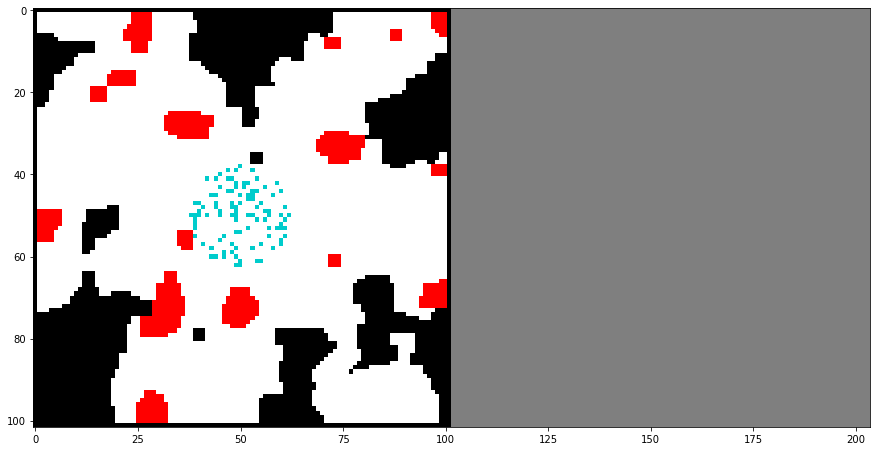

In [6]:
from swarm_mapping.world import World, Agent
from swarm_mapping.map import Map

w = World(100, 100, 100, space_fill=0.6, hazard_fill=0.15,fast=False, sensor_range=1)
w.show(size=(15,15))

0.021524429321289062 seconds to run step.
0.017221927642822266 seconds to render and display.


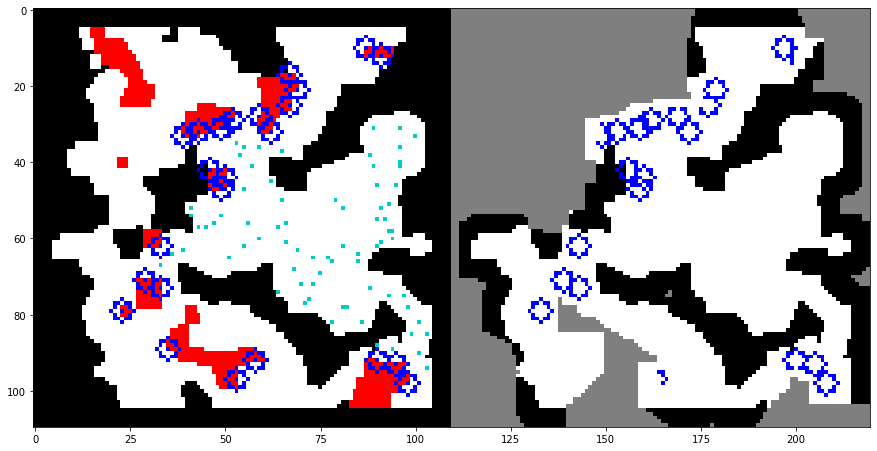

In [10]:
import time
import cProfile

# Iterate a step of the sim, and then show state
start = time.time()
#cProfile.run('w.step()')
w.step()
end = time.time()
print(f"{end - start} seconds to run step.")

start = time.time()
w.show(size=(15,15))
end = time.time()
print(f"{end - start} seconds to render and display.")

In [6]:
# Example of proximity sensor output
agent = w.agents[0]
agent.proximity()

array([[1., 1., 1.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [6]:
# Example of camera output
agent = w.agents[1]
agent.camera()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 2., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 2., 0., 0., 0., 0.],
       [0., 0., 2., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 2.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 2., 0.]])

### Run and Animate Simulation

In [4]:
import cv2
import numpy as np
from swarm_mapping.world import World

w = World(100, 100, 100, space_fill=0.5, hazard_fill=0.2,fast=False, marker_size=3)
# Display size
display_width = 1600
display_height = 800

step = 0
while True:
    frame = w.render()
    shared_map = w.render(w.agents_map)
    frame = np.concatenate((frame, shared_map), axis=1)
    frame = cv2.resize(frame, (display_width, display_height), interpolation = cv2.INTER_AREA)
    cv2.imshow('Sim',cv2.cvtColor((frame*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    w.step()
    step += 1
cv2.destroyAllWindows()

### Print Agent States

In [2]:
for agent in w.agents:
    print(agent)

Agent at (65.87467567428847,63.657157502311506), with velocity (0.750629326274838, 0.49459154996325627), alive: False
Agent at (42.31851239970868,52.31620664334191), with velocity (0.7014462398682619, -0.5480454648143125), alive: True
Agent at (53.54610735534395,37.848344509753595), with velocity (0.17220238792110604, -0.94755226811112), alive: True
Agent at (97.0082631115885,52.79826684251937), with velocity (0.9103275716027043, -0.09690327804296049), alive: True
Agent at (70.44440375216011,57.65079014871854), with velocity (0.8793950808657032, 0.2188381551387373), alive: True
Agent at (46.66932644416846,31.28601931803201), with velocity (-0.5142791155283521, -0.8427292767217055), alive: True
Agent at (68.69154961140879,44.62544588283663), with velocity (1.0317541901985836, -0.21442987695760748), alive: True
Agent at (45.45133621444242,41.69594269394603), with velocity (0.9354580092135024, -0.34127442251408663), alive: True
Agent at (62.480640579192624,25.554775505785155), with veloci